![Crowede](https://jtf.org/wp-content/uploads/2016/05/syrian_refugees_keleti_railway_station.jpg)

**We might think that most of our social welfare rarely help those people who need help indeed. Therefore, here comes the power of data science!**

### Outline

* Overlook

* Cleaning

* Basic EDA

* Modeling 

* Validation

## Overlook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
train.shape

(9557, 143)

In [4]:
train.head(3)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,...,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,10.0,0,0,0,1,0,0,0,0,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.00,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,...,12.0,0,0,0,0,0,0,0,1,0,1,1.0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.00,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,...,11.0,0,0,0,0,1,0,0,0,0,2,0.5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.25,64.0,121.0,8464,4


**Here, since I don't have too much time, I'll start it with some columns that I think are really important to the target. I'll add on other columns gradually if time allows**

Here are some features that I think it's important:

* v2a1, Monthly rent payment
* hacdor, =1 Overcrowding by bedrooms
* rooms,  number of all rooms in the house
* hacapo, =1 Overcrowding by rooms
* v14a, =1 has bathroom in the household
* refrig, =1 if the household has refrigerator
* v18q, owns a tablet
* r4h1, Males younger than 12 years of age
* r4h3, Total males in the household
* r4m1, Females younger than 12 years of age
* r4m3, Total females in the household
* tamhog, size of the household
* tamviv, number of persons living in the household
* pisonotiene, =1 if no floor at the household
* cielorazo, =1 if the house has ceiling
* abastaguano, =1 if no water provision
* noelec, =1 no electricity in the dwelling
* sanitario1, =1 no toilet in the dwelling
* epared1, =1 if walls are bad
* epared2, =1 if walls are regular
* epared3, =1 if walls are good
* etecho1, =1 if roof are bad
* etecho2, =1 if roof are regular
* etecho3, =1 if roof are good
* eviv1, =1 if floor are bad
* eviv2, =1 if floor are regular
* eviv3, =1 if floor are good
* dis, =1 if disable person
* idhogar, Household level identifier
* instlevel1, =1 no level of education
* instlevel2, =1 incomplete primary
* instlevel3, =1 complete primary
* instlevel4, =1 incomplete academic secondary level
* instlevel5, =1 complete academic secondary level
* instlevel6, =1 incomplete technical secondary level
* instlevel7, =1 complete technical secondary level
* instlevel8, =1 undergraduate and higher education
* instlevel9, =1 postgraduate higher education
* bedrooms, number of bedrooms
* overcrowding, # persons per room

In [5]:
#Check the ratio of hacdor & hacapo
len(train.loc[train.hacdor == 1])/len(train.loc[train.hacapo == 1])

1.6106194690265487

In [6]:
# Slicing the dataset
train = train[['v2a1','hacdor','rooms','hacapo','v14a','refrig','v18q','r4h1','r4h3','r4m1','r4m3','tamhog',
               'tamviv','pisonotiene','cielorazo','abastaguano','noelec','epared1',
               'epared2','epared3','etecho1','etecho2','etecho3','eviv1','eviv2','eviv3','dis','idhogar','instlevel1',
               'instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9',
               'bedrooms','overcrowding','Target']]

**And there are some columns that actually can be ordinal. I'll put them together''

epared1, =1 if walls are bad   
epared2, =1 if walls are regular   
epared3, =1 if walls are good   

etecho1, =1 if roof are bad   
etecho2, =1 if roof are regular   
etecho3, =1 if roof are good  

eviv1, =1 if floor are bad   
eviv2, =1 if floor are regular   
eviv3, =1 if floor are good  

I'll keep the following for now

instlevel1, =1 no level of education   
instlevel2, =1 incomplete primary   
instlevel3, =1 complete primary   
instlevel4, =1 incomplete academic secondary level   
instlevel5, =1 complete academic secondary level   
instlevel6, =1 incomplete technical secondary level   
instlevel7, =1 complete technical secondary level  
instlevel8, =1 undergraduate and higher education   
instlevel9, =1 postgraduate higher education   

In [7]:
df = train[['epared1','epared2','epared3']]
x = df.stack()
train['epared'] = np.array(pd.Categorical(x[x!=0].index.get_level_values(1)))
train['epared'] = train['epared'].apply(lambda x : 1 if x == 'epared1' else (2 if x == 'epared2' else 3))

In [8]:
df = train[['etecho1','etecho2','etecho3']]
x = df.stack()
train['etecho'] = np.array(pd.Categorical(x[x!=0].index.get_level_values(1)))
train['etecho'] = train['epared'].apply(lambda x : 1 if x == 'etecho1' else (2 if x == 'etecho2' else 3))

In [9]:
df = train[['eviv1','eviv2','eviv3']]
x = df.stack()
train['eviv'] = np.array(pd.Categorical(x[x!=0].index.get_level_values(1)))
train['eviv'] = train['epared'].apply(lambda x : 1 if x == 'eviv1' else (2 if x == 'eviv2' else 3))

In [10]:
train.drop(['epared1','epared2','epared3','etecho1','etecho2','etecho3','eviv1','eviv2','eviv3'],axis=1,inplace=True)

## Cleaning

In [11]:
train.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,r4h1,r4h3,r4m1,r4m3,tamhog,tamviv,pisonotiene,cielorazo,abastaguano,noelec,dis,idhogar,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,Target,epared,etecho,eviv
0,190000.0,0,3,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,21eb7fcc1,0,0,0,1,0,0,0,0,0,1,1.000000,4,2,3,3
1,135000.0,0,4,0,1,1,1,0,1,0,0,1,1,0,1,0,0,0,0e5d7a658,0,0,0,0,0,0,0,1,0,1,1.000000,4,2,3,3
2,NaN,0,8,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,2c7317ea8,0,0,0,0,1,0,0,0,0,2,0.500000,4,2,3,3
3,180000.0,0,5,0,1,1,1,0,2,1,2,4,4,0,1,0,0,0,2b58d945f,0,0,0,1,0,0,0,0,0,3,1.333333,4,3,3,3
4,180000.0,0,5,0,1,1,1,0,2,1,2,4,4,0,1,0,0,0,2b58d945f,0,0,0,0,1,0,0,0,0,3,1.333333,4,3,3,3


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Data columns (total 34 columns):
v2a1            2697 non-null float64
hacdor          9557 non-null int64
rooms           9557 non-null int64
hacapo          9557 non-null int64
v14a            9557 non-null int64
refrig          9557 non-null int64
v18q            9557 non-null int64
r4h1            9557 non-null int64
r4h3            9557 non-null int64
r4m1            9557 non-null int64
r4m3            9557 non-null int64
tamhog          9557 non-null int64
tamviv          9557 non-null int64
pisonotiene     9557 non-null int64
cielorazo       9557 non-null int64
abastaguano     9557 non-null int64
noelec          9557 non-null int64
dis             9557 non-null int64
idhogar         9557 non-null object
instlevel1      9557 non-null int64
instlevel2      9557 non-null int64
instlevel3      9557 non-null int64
instlevel4      9557 non-null int64
instlevel5      9557 non-null int64
instlevel6      9557 non-n

In [13]:
train.idhogar.value_counts()

fd8a6d014    13
ae6cf0558    12
0c7436de6    12
b7a0b59d7    11
3fe29a56b    11
6b35cdcf0    11
4476ccd4c    11
a18c0c0be    10
63f11d6ea    10
f2a4cd356    10
7cad2d6c4    10
0fc6c05f7    10
6a96a96c0    10
06ca88023     9
efec7e82c     9
322cefd2f     9
9fd143d1f     9
9d70c1551     9
d43a04997     9
d4e1dc02c     9
ae489f548     9
1ed926340     9
476b3f2ee     9
7b7ebaf70     8
a2f99b6bc     8
4f2bd02b9     8
8857dd685     8
1c0b1cbd8     8
493f97dcb     8
a32c04257     8
             ..
141ac6fb3     1
91fc4c109     1
e5dc9ea51     1
2480d7421     1
b6fdd6fac     1
48919b9f0     1
66701a0de     1
01c6fcb6e     1
09d9f0be5     1
51dbfbe84     1
fa5c14ce6     1
cd1fb5fab     1
e453d01f8     1
5438b3a5e     1
5463ebd0e     1
f17413e09     1
2fe198a91     1
5e92f4165     1
a382bbff2     1
2161940cd     1
1f5ef45bf     1
0f70c06f4     1
62e2a0c17     1
020713493     1
5165c22c9     1
d2cb24e59     1
a4e3420f5     1
648d9b6c5     1
3ea79f7c9     1
cee0f3318     1
Name: idhogar, Length: 2

In [14]:
train.drop('idhogar',axis=1,inplace=True)

In [15]:
pd.isnull(train).sum()

v2a1            6860
hacdor             0
rooms              0
hacapo             0
v14a               0
refrig             0
v18q               0
r4h1               0
r4h3               0
r4m1               0
r4m3               0
tamhog             0
tamviv             0
pisonotiene        0
cielorazo          0
abastaguano        0
noelec             0
dis                0
instlevel1         0
instlevel2         0
instlevel3         0
instlevel4         0
instlevel5         0
instlevel6         0
instlevel7         0
instlevel8         0
instlevel9         0
bedrooms           0
overcrowding       0
Target             0
epared             0
etecho             0
eviv               0
dtype: int64

In [16]:
train.drop('v2a1',axis=1,inplace=True)

In [17]:
train.shape

(9557, 32)

Text(0.5,1,'Distribution of Target')

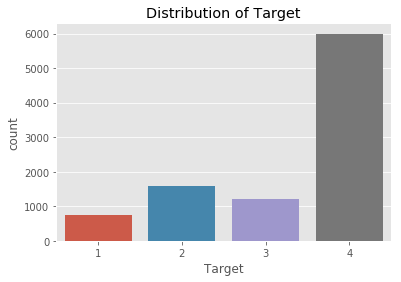

In [18]:
sns.countplot(train.Target)
plt.title('Distribution of Target')

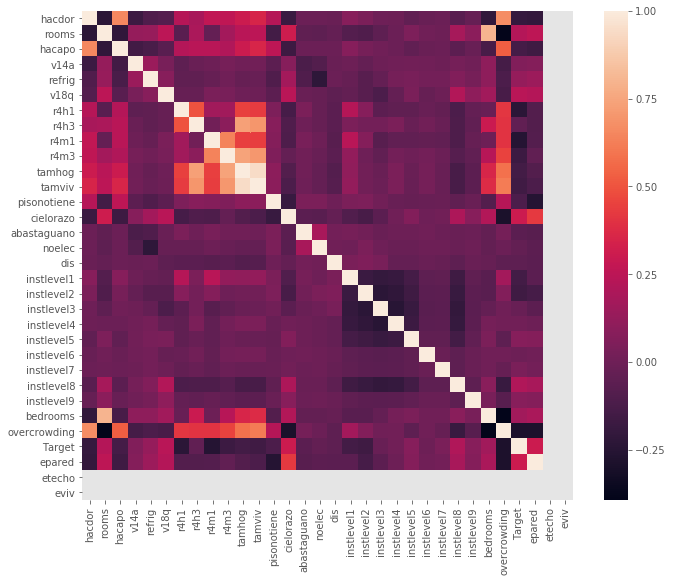

In [19]:
corr = train.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [21]:
X = train.drop('Target',axis=1)
y = train[['Target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
# Create the model and assign it to the variable model.
model = DecisionTreeClassifier()

# Fit the model.
model.fit(X_train,y_train)
# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test)

# Calculate the accuracy and assign it to the variable acc.
print('The accuracy for the model is:', accuracy_score(y_test,y_pred))

The accuracy for the model is: 0.7681311018131102


Text(33,0.5,'True label')

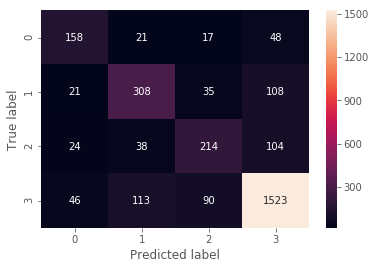

In [23]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='2.0f')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [ ]:
test_df = test[['hacdor','rooms','hacapo','v14a','refrig','v18q','r4h1','r4h3','r4m1','r4m3','tamhog',
               'tamviv','pisonotiene','cielorazo','abastaguano','noelec','epared1',
               'epared2','epared3','etecho1','etecho2','etecho3','eviv1','eviv2','eviv3','dis','instlevel1',
               'instlevel2','instlevel3','instlevel4','instlevel5','instlevel6','instlevel7','instlevel8','instlevel9',
               'bedrooms','overcrowding']]

df = test_df[['epared1','epared2','epared3']]
x = df.stack()
test_df['epared'] = np.array(pd.Categorical(x[x!=0].index.get_level_values(1)))
test_df['epared'] = test_df['epared'].apply(lambda x : 1 if x == 'epared1' else (2 if x == 'epared2' else 3))

df = test_df[['etecho1','etecho2','etecho3']]
x = df.stack()
test_df['etecho'] = np.array(pd.Categorical(x[x!=0].index.get_level_values(1)))
test_df['etecho'] = test_df['epared'].apply(lambda x : 1 if x == 'etecho1' else (2 if x == 'etecho2' else 3))

df = test_df[['eviv1','eviv2','eviv3']]
x = df.stack()
test_df['eviv'] = np.array(pd.Categorical(x[x!=0].index.get_level_values(1)))
test_df['eviv'] = test_df['epared'].apply(lambda x : 1 if x == 'eviv1' else (2 if x == 'eviv2' else 3))

test_df.drop(['epared1','epared2','epared3','etecho1','etecho2','etecho3','eviv1','eviv2','eviv3'],axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
model = DecisionTreeClassifier()
model.fit(X, y)
prediction = model.predict(test_df)
submission = pd.read_csv('../input/sample_submission.csv')
submission['Target'] = prediction
submission.to_csv('submission.csv',index=False)